In [1]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import rasterio
import pandas as pd

imgs = glob.glob('Tasmania_ohara_labels/i20081007_224547_cv_RGB/*')
len(imgs)
imgs[:4]

['Tasmania_ohara_labels/i20081007_224547_cv_RGB/PR_20081007_230544_141_LC16.png',
 'Tasmania_ohara_labels/i20081007_224547_cv_RGB/PR_20081007_230308_119_LC16.png',
 'Tasmania_ohara_labels/i20081007_224547_cv_RGB/PR_20081007_230542_140_LC16.png',
 'Tasmania_ohara_labels/i20081007_224547_cv_RGB/PR_20081007_230318_117_LC16.png']

(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)
(1024, 1360, 3)


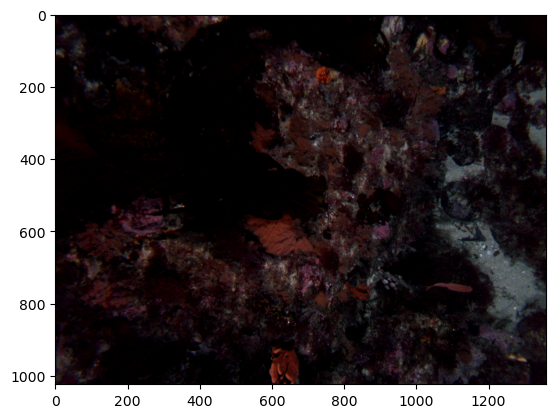

In [2]:
im = Image.open(imgs[0])
a = np.asarray(im)
plt.imshow(a)
for i in range(10):
    im = Image.open(imgs[i])
    a = np.asarray(im)
    print(a.shape)

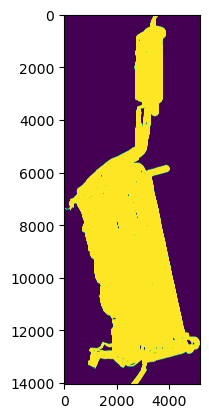

In [5]:
Ohara_DEM = rasterio.open('Tasmania_ohara_labels/fort1.tif')
plt.imshow(Ohara_DEM.read()[0])

In [28]:
Ohara_DEM.bounds
Ohara_DEM.read()[0].shape

(14044, 5161)

In [32]:
step = (Ohara_DEM.bounds.right-Ohara_DEM.bounds.left)/Ohara_DEM.read()[0].shape[1]
xticks = (np.arange(Ohara_DEM.bounds.left,Ohara_DEM.bounds.right, step))
step = (Ohara_DEM.bounds.top-Ohara_DEM.bounds.bottom)/Ohara_DEM.read()[0].shape[1]
yticks = (np.arange(Ohara_DEM.bounds.bottom,Ohara_DEM.bounds.top, step))

In [36]:
xticks

array([576177.38, 576179.38, 576181.38, ..., 586493.38, 586495.38,
       586497.38])

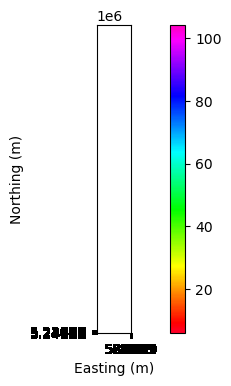

In [35]:
from rasterio.plot import show

raster = rasterio.open('Tasmania_ohara_labels/fort1.tif')

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))

# Plot Red, Green and Blue (rgb)
#show((raster, 1), cmap='gist_rainbow', ax=ax1)
plt.imshow(masked_array[0], cmap='gist_rainbow')
plt.colorbar()

# Add titles
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
plt.show()


In [7]:
val_to_rep = Ohara_DEM.read()[0][0][0]
new_ohara = Ohara_DEM.read()
new_val = 0
new_ohara[new_ohara==val_to_rep]=new_val

In [9]:
masked_array = np.ma.masked_where(new_ohara == new_val, new_ohara)


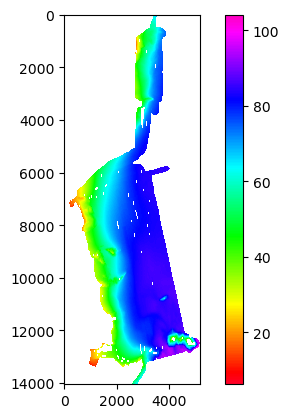

In [37]:
#cmap = matplotlib.cm.gist rainbow  # Can be any colormap that you want after the cm
#cmap.set_bad(color='white')
plt.imshow(masked_array[0], cmap='gist_rainbow')
plt.colorbar()
resolution_value = 1200
plt.savefig('Images_thesis/Ohara_dem.png',format="png", dpi=resolution_value, bbox_inches='tight')

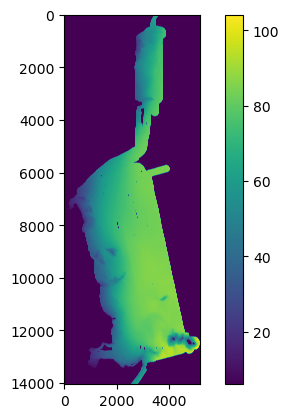

In [5]:
plt.imshow(new_ohara[0])
plt.colorbar()
resolution_value = 1200
plt.savefig('Images_thesis/Ohara_dem.png',format="png", dpi=resolution_value, bbox_inches='tight')

In [6]:
print(np.max(new_ohara), np.min(new_ohara))

104.129 6.0


In [8]:
print(Ohara_DEM.shape)
print(Ohara_DEM.crs)
Ohara_DEM.read()

(14044, 5161)
EPSG:32755


array([[[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]]], dtype=float32)

In [2]:
df_labels =  pd.read_csv('Tasmania_ohara_labels/image_labels.data',skiprows = np.arange(15),sep = "\t")
                    #names = ['row_id','timestamp','left_image','right_image','cluster_id'], )
df_labels.rename(columns = {'left_image':'Left image name', 'right_image':'Right image name'}, inplace = True)
df_labels['Left image name'] = df_labels['Left image name'].str.strip()
df_labels['Right image name'] = df_labels['Right image name'].str.strip()
df_labels

,row_id,timestamp,Left image name,Right image name,cluster_id
0,4,1.223421e+09,PR_20081007_230311_116_LC16.png,PR_20081007_230311_116_RM16.png,6
1,5,1.223421e+09,PR_20081007_230312_116_LC16.png,PR_20081007_230312_116_RM16.png,6
2,6,1.223421e+09,PR_20081007_230313_115_LC16.png,PR_20081007_230313_115_RM16.png,6
3,7,1.223421e+09,PR_20081007_230314_121_LC16.png,PR_20081007_230314_121_RM16.png,6
4,8,1.223421e+09,PR_20081007_230315_120_LC16.png,PR_20081007_230315_120_RM16.png,6
...,...,...,...,...,...
10962,11273,1.223432e+09,PR_20081008_021101_665_LC16.png,PR_20081008_021101_665_RM16.png,6
10963,11274,1.223432e+09,PR_20081008_021102_664_LC16.png,PR_20081008_021102_664_RM16.png,6
10964,11275,1.223432e+09,PR_20081008_021103_664_LC16.png,PR_20081008_021103_664_RM16.png,6
10965,11276,1.223432e+09,PR_20081008_021104_665_LC16.png,PR_20081008_021104_665_RM16.png,6


In [3]:
np.sort(df_labels.cluster_id.unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
stereo_data_cols_names = ['Pose identifier', 'timestamp', 'Latitude', 'Longitude', 'X position (North)',
                         'Y position (East)', 'Z position (Depth)','X-axis Euler angle', 'Y-axis Euler angle',
                         'Z-axis Euler angle', 'Left image name', 'Right image name', 'Vehicle altitude', 
                         'Approx. bounding image radius', 'Likely trajectory cross-over point']

In [5]:
df_coords =  pd.read_csv('Tasmania_ohara_labels/stereo_pose_est.data',skiprows = np.arange(57),sep = "\t",
                    names = stereo_data_cols_names)
df_coords['Left image name'] = df_coords['Left image name'].str.strip()
df_coords['Right image name'] = df_coords['Right image name'].str.strip()
df_coords

,Pose identifier,timestamp,Latitude,Longitude,X position (North),Y position (East),Z position (Depth),X-axis Euler angle,Y-axis Euler angle,Z-axis Euler angle,Left image name,Right image name,Vehicle altitude,Approx. bounding image radius,Likely trajectory cross-over point
0,2049,1.223421e+09,-43.084560,147.974667,-0.217644,-1.567568,32.073775,0.014028,0.000322,-1.333084,PR_20081007_230307_118_LC16.png,PR_20081007_230307_118_RM16.png,2.235,0.756200,0
1,2051,1.223421e+09,-43.084561,147.974667,-0.355798,-1.579343,32.063682,0.029300,-0.002989,-1.464250,PR_20081007_230308_119_LC16.png,PR_20081007_230308_119_RM16.png,2.268,0.767366,0
2,2053,1.223421e+09,-43.084562,147.974667,-0.447979,-1.533967,32.099087,0.027989,0.005893,-1.652637,PR_20081007_230309_117_LC16.png,PR_20081007_230309_117_RM16.png,2.190,0.740975,0
3,2055,1.223421e+09,-43.084562,147.974669,-0.471056,-1.408019,32.150742,0.018275,0.012472,-1.900922,PR_20081007_230310_116_LC16.png,PR_20081007_230310_116_RM16.png,2.143,0.725073,0
4,2057,1.223421e+09,-43.084562,147.974671,-0.437141,-1.227821,32.156350,0.011374,0.000872,-2.174831,PR_20081007_230311_116_LC16.png,PR_20081007_230311_116_RM16.png,2.230,0.754509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11273,24650,1.223432e+09,-43.083210,147.974083,149.661403,-49.113566,32.423133,0.020202,-0.002820,1.265366,PR_20081008_021101_665_LC16.png,PR_20081008_021101_665_RM16.png,1.950,0.659772,0
11274,24652,1.223432e+09,-43.083207,147.974081,150.015155,-49.238257,32.383773,0.011275,0.009641,1.413536,PR_20081008_021102_664_LC16.png,PR_20081008_021102_664_RM16.png,2.050,0.693607,0
11275,24654,1.223432e+09,-43.083204,147.974080,150.373901,-49.343201,32.374147,0.010260,0.003011,1.521798,PR_20081008_021103_664_LC16.png,PR_20081008_021103_664_RM16.png,2.042,0.690900,0
11276,24656,1.223432e+09,-43.083200,147.974079,150.759128,-49.428537,32.362804,0.018431,-0.003524,1.529485,PR_20081008_021104_665_LC16.png,PR_20081008_021104_665_RM16.png,2.000,0.676689,0


In [13]:
Ohara_DEM.crs

CRS.from_epsg(32755)

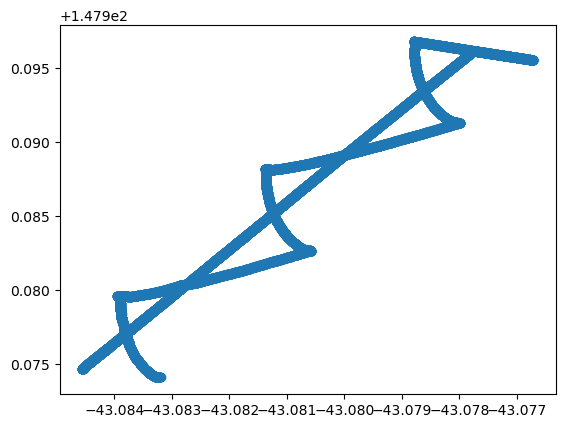

In [14]:
plt.scatter(df_coords['Latitude'],df_coords['Longitude'])

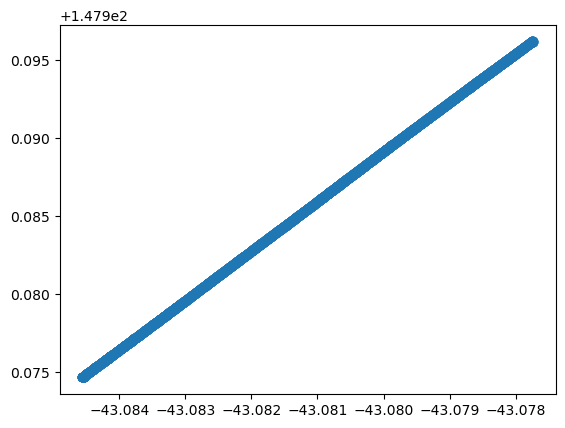

In [15]:
dim = 4460
plt.scatter(df_coords['Latitude'][:dim],df_coords['Longitude'][:dim])

In [16]:
df_coords.columns

Index(['Pose identifier', 'timestamp', 'Latitude', 'Longitude',
       'X position (North)', 'Y position (East)', 'Z position (Depth)',
       'X-axis Euler angle', 'Y-axis Euler angle', 'Z-axis Euler angle',
       'Left image name', 'Right image name', 'Vehicle altitude',
       'Approx. bounding image radius', 'Likely trajectory cross-over point'],
      dtype='object')

In [6]:
df_merged = pd.merge(df_labels, df_coords, on='Left image name')
df_merged

,row_id,timestamp_x,Left image name,Right image name_x,cluster_id,Pose identifier,timestamp_y,Latitude,Longitude,X position (North),Y position (East),Z position (Depth),X-axis Euler angle,Y-axis Euler angle,Z-axis Euler angle,Right image name_y,Vehicle altitude,Approx. bounding image radius,Likely trajectory cross-over point
0,4,1.223421e+09,PR_20081007_230311_116_LC16.png,PR_20081007_230311_116_RM16.png,6,2057,1.223421e+09,-43.084562,147.974671,-0.437141,-1.227821,32.156350,0.011374,0.000872,-2.174831,PR_20081007_230311_116_RM16.png,2.230,0.754509,0
1,5,1.223421e+09,PR_20081007_230312_116_LC16.png,PR_20081007_230312_116_RM16.png,6,2059,1.223421e+09,-43.084561,147.974673,-0.332452,-1.053617,32.107432,0.018689,-0.008512,-2.412619,PR_20081007_230312_116_RM16.png,2.192,0.741651,0
2,6,1.223421e+09,PR_20081007_230313_115_LC16.png,PR_20081007_230313_115_RM16.png,6,2061,1.223421e+09,-43.084559,147.974675,-0.163857,-0.913004,32.007422,0.031767,-0.001775,-2.607422,PR_20081007_230313_115_RM16.png,2.317,0.783945,0
3,7,1.223421e+09,PR_20081007_230314_121_LC16.png,PR_20081007_230314_121_RM16.png,6,2063,1.223421e+09,-43.084557,147.974676,0.063424,-0.819204,31.902411,0.031503,0.011648,-2.761294,PR_20081007_230314_121_RM16.png,2.292,0.775486,0
4,8,1.223421e+09,PR_20081007_230315_120_LC16.png,PR_20081007_230315_120_RM16.png,6,2065,1.223421e+09,-43.084555,147.974677,0.350782,-0.756743,31.847475,0.017726,0.017393,-2.924700,PR_20081007_230315_120_RM16.png,2.308,0.780899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,11273,1.223432e+09,PR_20081008_021101_665_LC16.png,PR_20081008_021101_665_RM16.png,6,24650,1.223432e+09,-43.083210,147.974083,149.661403,-49.113566,32.423133,0.020202,-0.002820,1.265366,PR_20081008_021101_665_RM16.png,1.950,0.659772,0
10963,11274,1.223432e+09,PR_20081008_021102_664_LC16.png,PR_20081008_021102_664_RM16.png,6,24652,1.223432e+09,-43.083207,147.974081,150.015155,-49.238257,32.383773,0.011275,0.009641,1.413536,PR_20081008_021102_664_RM16.png,2.050,0.693607,0
10964,11275,1.223432e+09,PR_20081008_021103_664_LC16.png,PR_20081008_021103_664_RM16.png,6,24654,1.223432e+09,-43.083204,147.974080,150.373901,-49.343201,32.374147,0.010260,0.003011,1.521798,PR_20081008_021103_664_RM16.png,2.042,0.690900,0
10965,11276,1.223432e+09,PR_20081008_021104_665_LC16.png,PR_20081008_021104_665_RM16.png,6,24656,1.223432e+09,-43.083200,147.974079,150.759128,-49.428537,32.362804,0.018431,-0.003524,1.529485,PR_20081008_021104_665_RM16.png,2.000,0.676689,0


# In same crs format as DEM (EPSG32755)

In [7]:
from pyproj import Proj, transform

Pfrom = Proj(init='epsg:4326')
Pto = Proj(init='epsg:32755')

long_32755,lat_32755 = transform(Pfrom, Pto, df_merged['Longitude'], df_merged['Latitude'])

/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_510323/810530265.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas

In [8]:
#long_32755,lat_32755
df_merged['long_32755'] = long_32755
df_merged['lat_32755'] = lat_32755

In [9]:
df_merged['cluster_id'] = df_merged['cluster_id'].replace([1, 2, 3 ,4,5, 6, 7, 8], [0, 1, 2, 3 ,4,5, 6, 7])

In [10]:
df_merged['cluster_id']
#should show 5

0        5
1        5
2        5
3        5
4        5
        ..
10962    5
10963    5
10964    5
10965    5
10966    5
Name: cluster_id, Length: 10967, dtype: int64

In [38]:
df_merged[df_merged['cluster_id']==1]['Latitude']
df_merged[df_merged['cluster_id']==1]['Longitude']

436      147.976626
483      147.976855
484      147.976860
485      147.976866
502      147.976951
            ...    
10311    147.976933
10312    147.976928
10346    147.976791
10367    147.976692
10368    147.976688
Name: Longitude, Length: 4094, dtype: float64

In [39]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

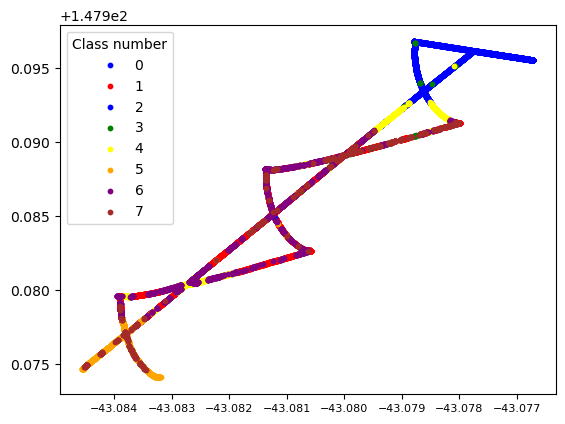

In [45]:
import numpy as np
from matplotlib import pyplot as plt
labels = np.arange(8)
cdict = {0: 'blue',1: 'red', 2: 'blue', 3: 'green',4: 'yellow',5: 'orange',6: 'purple',7: 'brown'}

fig, ax = plt.subplots()
for label in labels:
    scatter_x = df_merged[df_merged['cluster_id']==label]['Latitude']
    scatter_y = df_merged[df_merged['cluster_id']==label]['Longitude']
    ax.scatter(scatter_x, scatter_y, c = cdict[label], label = label, s = 10)
ax.legend(title='Class number')
plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
#plt.show()
plt.savefig('Images_thesis/camera_path.png',format="png", dpi=resolution_value, bbox_inches='tight')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])

group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

# Label distribution

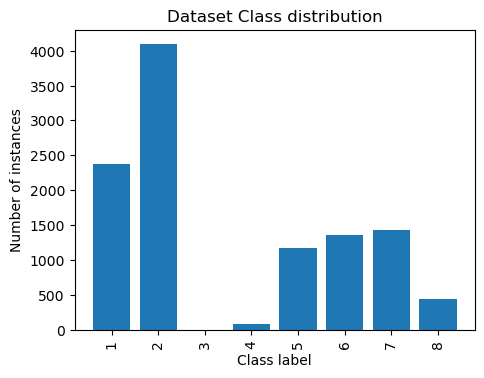

In [47]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
classes = [1,2,3,4,5,6,7,8]
ax.bar(classes,np.bincount(df_merged['cluster_id']))
plt.xticks(rotation='vertical')
plt.title('Dataset Class distribution')
plt.xlabel("Class label")
plt.ylabel("Number of instances")
#plt.show()
plt.savefig('Images_thesis/Ohara_distribution.png',format="png", dpi=resolution_value, bbox_inches='tight')

In [11]:
with open('files_remove_indices/Ohara_labels_train_set_indexes.npy', 'rb') as f:
    train_set_indexes_labels = np.load(f)

with open('files_remove_indices/Ohara_labels_test_set_indexes.npy', 'rb') as f:
    test_set_indexes_labels = np.load(f)
    

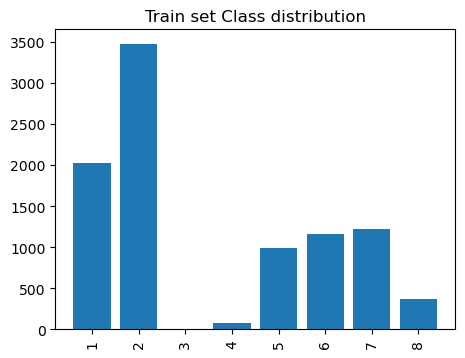

In [23]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
classes = [1,2,3,4,5,6,7,8]
ax.bar(classes,np.bincount(df_merged['cluster_id'][train_set_indexes_labels]))
plt.xticks(rotation='vertical')
plt.title('Train set Class distribution')
plt.show()


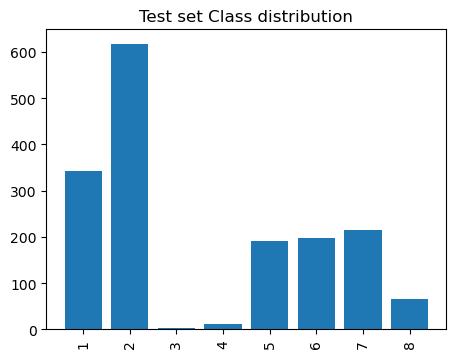

In [24]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
classes = [1,2,3,4,5,6,7,8]
ax.bar(classes,np.bincount(df_merged['cluster_id'][test_set_indexes_labels]))
plt.xticks(rotation='vertical')
plt.title('Test set Class distribution')
plt.show()


#  Path for images

In [20]:
csv_paths = sorted(glob.glob('Tasmania_ohara_labels/All_images_csv/*'))

In [49]:
df1 = pd.read_csv(csv_paths[0])
for idx, path in enumerate(csv_paths):
    if idx!=0:
        df2 = pd.read_csv(path)
        df1 = pd.concat([df1, df2])
df1

,year,month,day,hour,minute,second,northing,easting,depth,latitude,longitude,roll,pitch,heading,altitude,leftimage,rightimage
0,2008,10,6,23,17,32.33,1.928022,0.620384,1.491017,-43.061543,147.964807,0.020547,-0.034463,1.915706,35.575,PR_20081006_231732_335_LC16.png,PR_20081006_231732_335_RM16.png
1,2008,10,6,23,17,33.33,2.225513,0.735902,1.502037,-43.061540,147.964809,-0.013038,-0.002766,1.930942,35.815,PR_20081006_231733_335_LC16.png,PR_20081006_231733_335_RM16.png
2,2008,10,6,23,17,34.34,2.428529,0.900283,1.564695,-43.061538,147.964811,0.017823,0.021112,2.104235,36.055,PR_20081006_231734_340_LC16.png,PR_20081006_231734_340_RM16.png
3,2008,10,6,23,17,35.34,2.586451,1.101082,1.686555,-43.061537,147.964813,0.021608,-0.001410,2.387795,36.058,PR_20081006_231735_340_LC16.png,PR_20081006_231735_340_RM16.png
4,2008,10,6,23,17,36.34,2.591588,1.203672,1.608424,-43.061537,147.964814,0.038230,-0.021153,2.665942,35.815,PR_20081006_231736_340_LC16.png,PR_20081006_231736_340_RM16.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,2008,10,14,7,24,50.81,551.795382,1285.861666,63.501574,-43.079454,147.990401,-0.004258,-0.025680,-1.948804,2.678,PR_20081014_072450_818_LC16.png,PR_20081014_072450_818_RM16.png
6560,2008,10,14,7,24,51.82,551.367730,1285.927042,63.587162,-43.079458,147.990402,0.006958,0.011469,-1.926500,2.620,PR_20081014_072451_820_LC16.png,PR_20081014_072451_820_RM16.png
6561,2008,10,14,7,24,52.82,550.959485,1286.101300,63.677437,-43.079462,147.990404,0.014028,0.016612,-2.025841,2.402,PR_20081014_072452_820_LC16.png,PR_20081014_072452_820_RM16.png
6562,2008,10,14,7,24,53.81,550.570938,1286.284656,63.789218,-43.079465,147.990407,0.018790,-0.005171,-2.086175,2.438,PR_20081014_072453_817_LC16.png,PR_20081014_072453_817_RM16.png


In [50]:
df_all_images_path = df1

In [51]:
from pyproj import Proj, transform

Pfrom = Proj(init='epsg:4326')
Pto = Proj(init='epsg:32755')

long_32755,lat_32755 = transform(Pfrom, Pto, df_all_images_path['longitude'], df_all_images_path['latitude'])
df_all_images_path['long_32755'] = long_32755
df_all_images_path['lat_32755'] = lat_32755

/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_3310021/2521300433.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotch

In [52]:
import shapefile
with shapefile.Writer(r"Tasmania_ohara_labels/Ohara_created_images/cropPoints_images.shp") as w:
        w.field('cluster_id', 'C')

        for lat, long in zip(df_all_images_path['lat_32755'],df_all_images_path['long_32755']):#,df_merged['cluster_id']):
            #print(f"position_lat_degrees: {lat}")
            #print(f"position_long_degrees: {long}\n")
            w.point(long, lat)
            w.record(11)

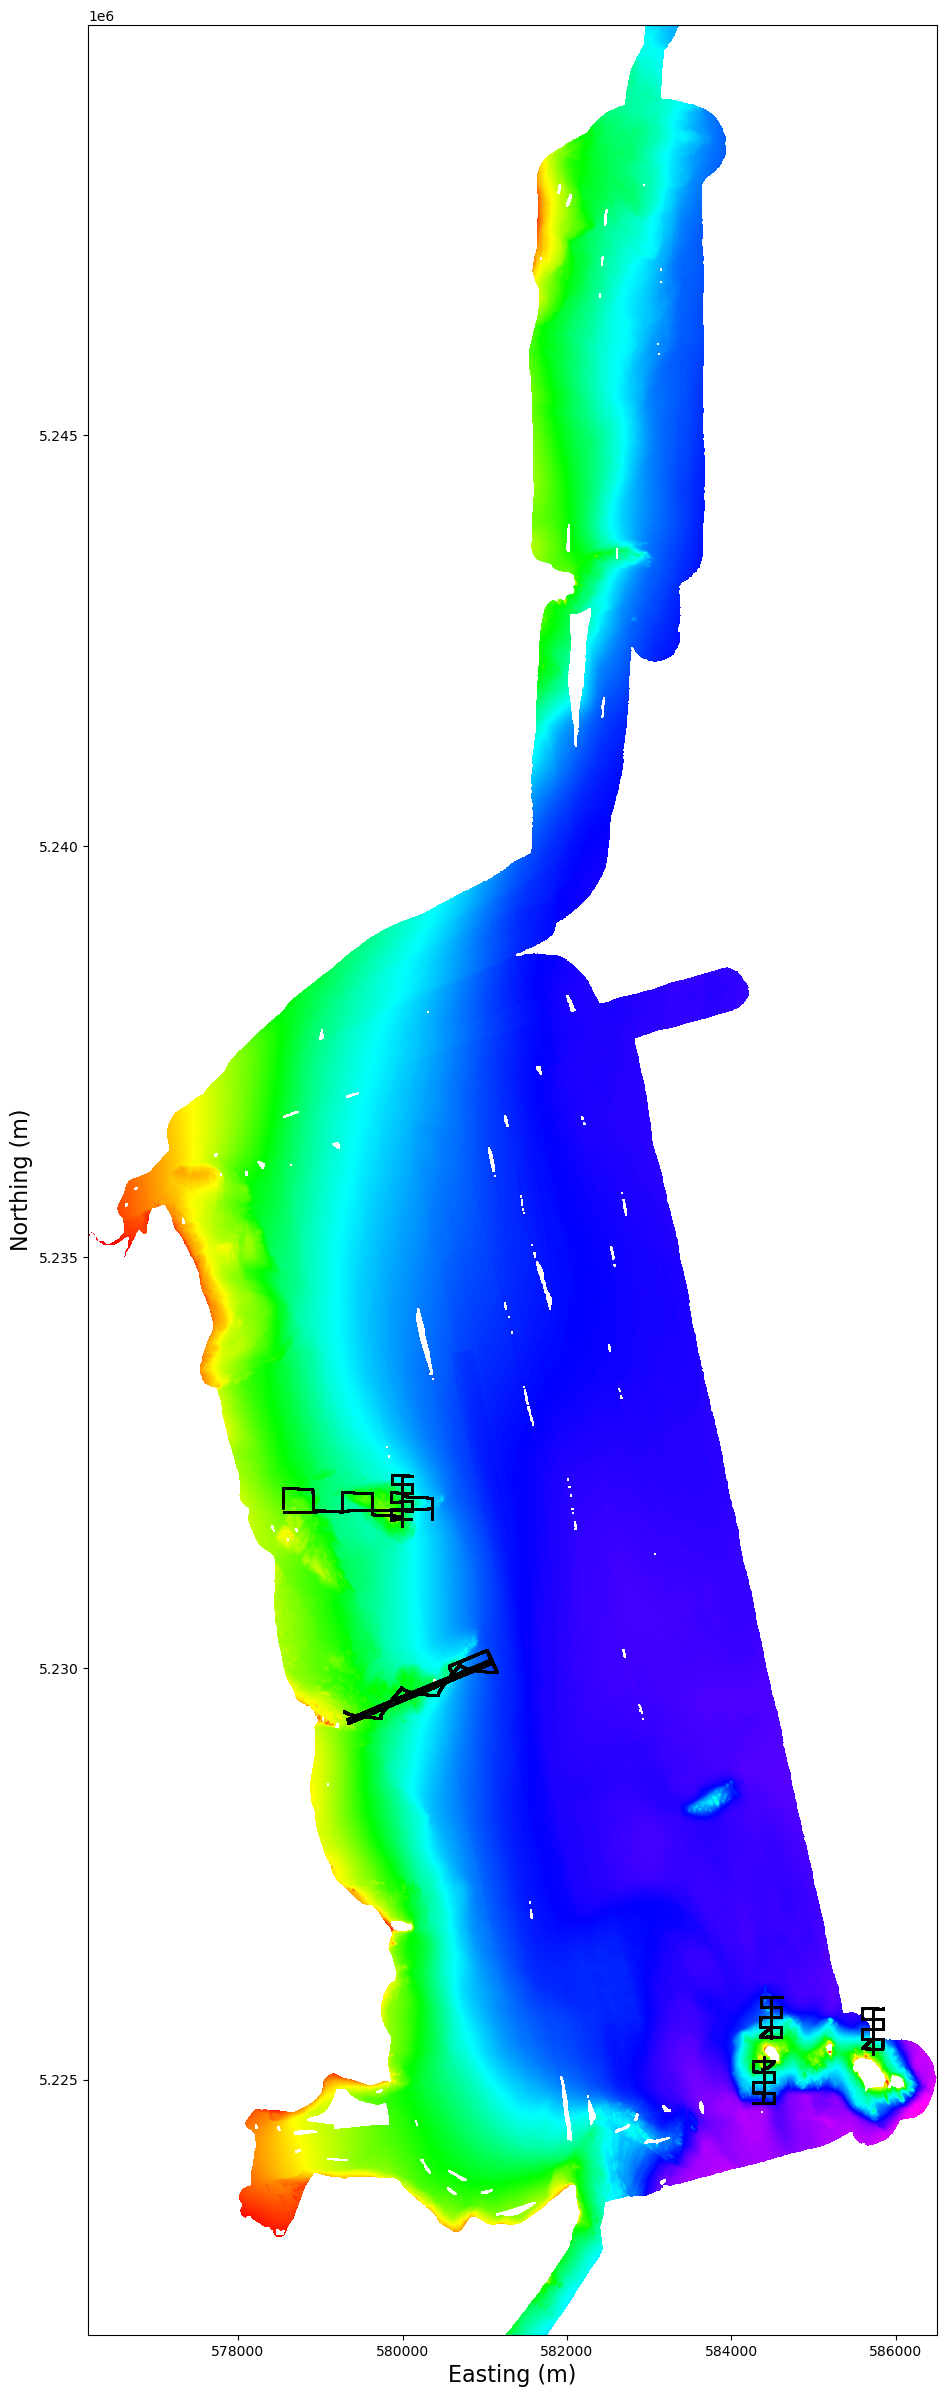

In [56]:
import rasterio
import numpy as np
from rasterio import plot as rasterplot
import geopandas as gpd
from matplotlib import pyplot as plt


# this is how you'd open the raster dataset if you have one
tiff = rasterio.open('Tasmania_ohara_labels/fort1.tif')
tiff_extent = [tiff.bounds[0], tiff.bounds[2], tiff.bounds[1], tiff.bounds[3]]

# i am making this array up
#tiff_band_1 = np.random.randint(0, 10, size=(65, 64))
#tiff_extent = [4159200.0, 4808100.0, 2828000.0, 3482600.0]

shapefile = gpd.read_file('Tasmania_ohara_labels/Ohara_created_images/cropPoints_images.shp')
#shapefile = shapefile.to_crs('EPSG:32755')
#shapefile = shapefile[shapefile.name == 'Germany']

f, ax = plt.subplots(figsize=(30, 30))


# plot DEM
rasterplot.show(
    #tiff.read(),  # use tiff.read(1) with your data
    masked_array,
    extent=tiff_extent,
    ax=ax,cmap='gist_rainbow' 

)
plt.xlabel('Easting (m)',fontsize=16)
plt.ylabel('Northing (m)',fontsize=16)
# plot shapefiles
shapefile.plot(ax=ax, facecolor='w', edgecolor='k',markersize=0.5)
#plt.savefig('test.jpg')
#plt.show()
plt.savefig('Images_thesis/Ohara_with_all_paths.png',format="png", dpi=resolution_value, bbox_inches='tight')

# Creating a shapefile and plotting with it

In [35]:
import shapefile
with shapefile.Writer(r"Tasmania_ohara_labels/Ohara_created_images/cropPoints.shp") as w:
        w.field('cluster_id', 'C')

        for lat, long, label in zip(df_merged['lat_32755'],df_merged['long_32755'],df_merged['cluster_id']):
            #print(f"position_lat_degrees: {lat}")
            #print(f"position_long_degrees: {long}\n")
            w.point(long, lat)
            w.record(label)

import fiona
schema = {
    'geometry':'Point',
    'properties':[('Name','str')]
}
#open a fiona object
pointShp = fiona.open('Tasmania_ohara_labels/Ohara_created_images/cropPoints.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")
#iterate over each row in the dataframe and save record
for long, lat in zip(long_32755,lat_32755):
    rowDict = {
        'geometry' : {'type':'Point',
                     'coordinates': (long,lat)},
        #'properties': {'Name' : row.Name},
    }
    pointShp.write(rowDict)
#close fiona object
pointShp.close()

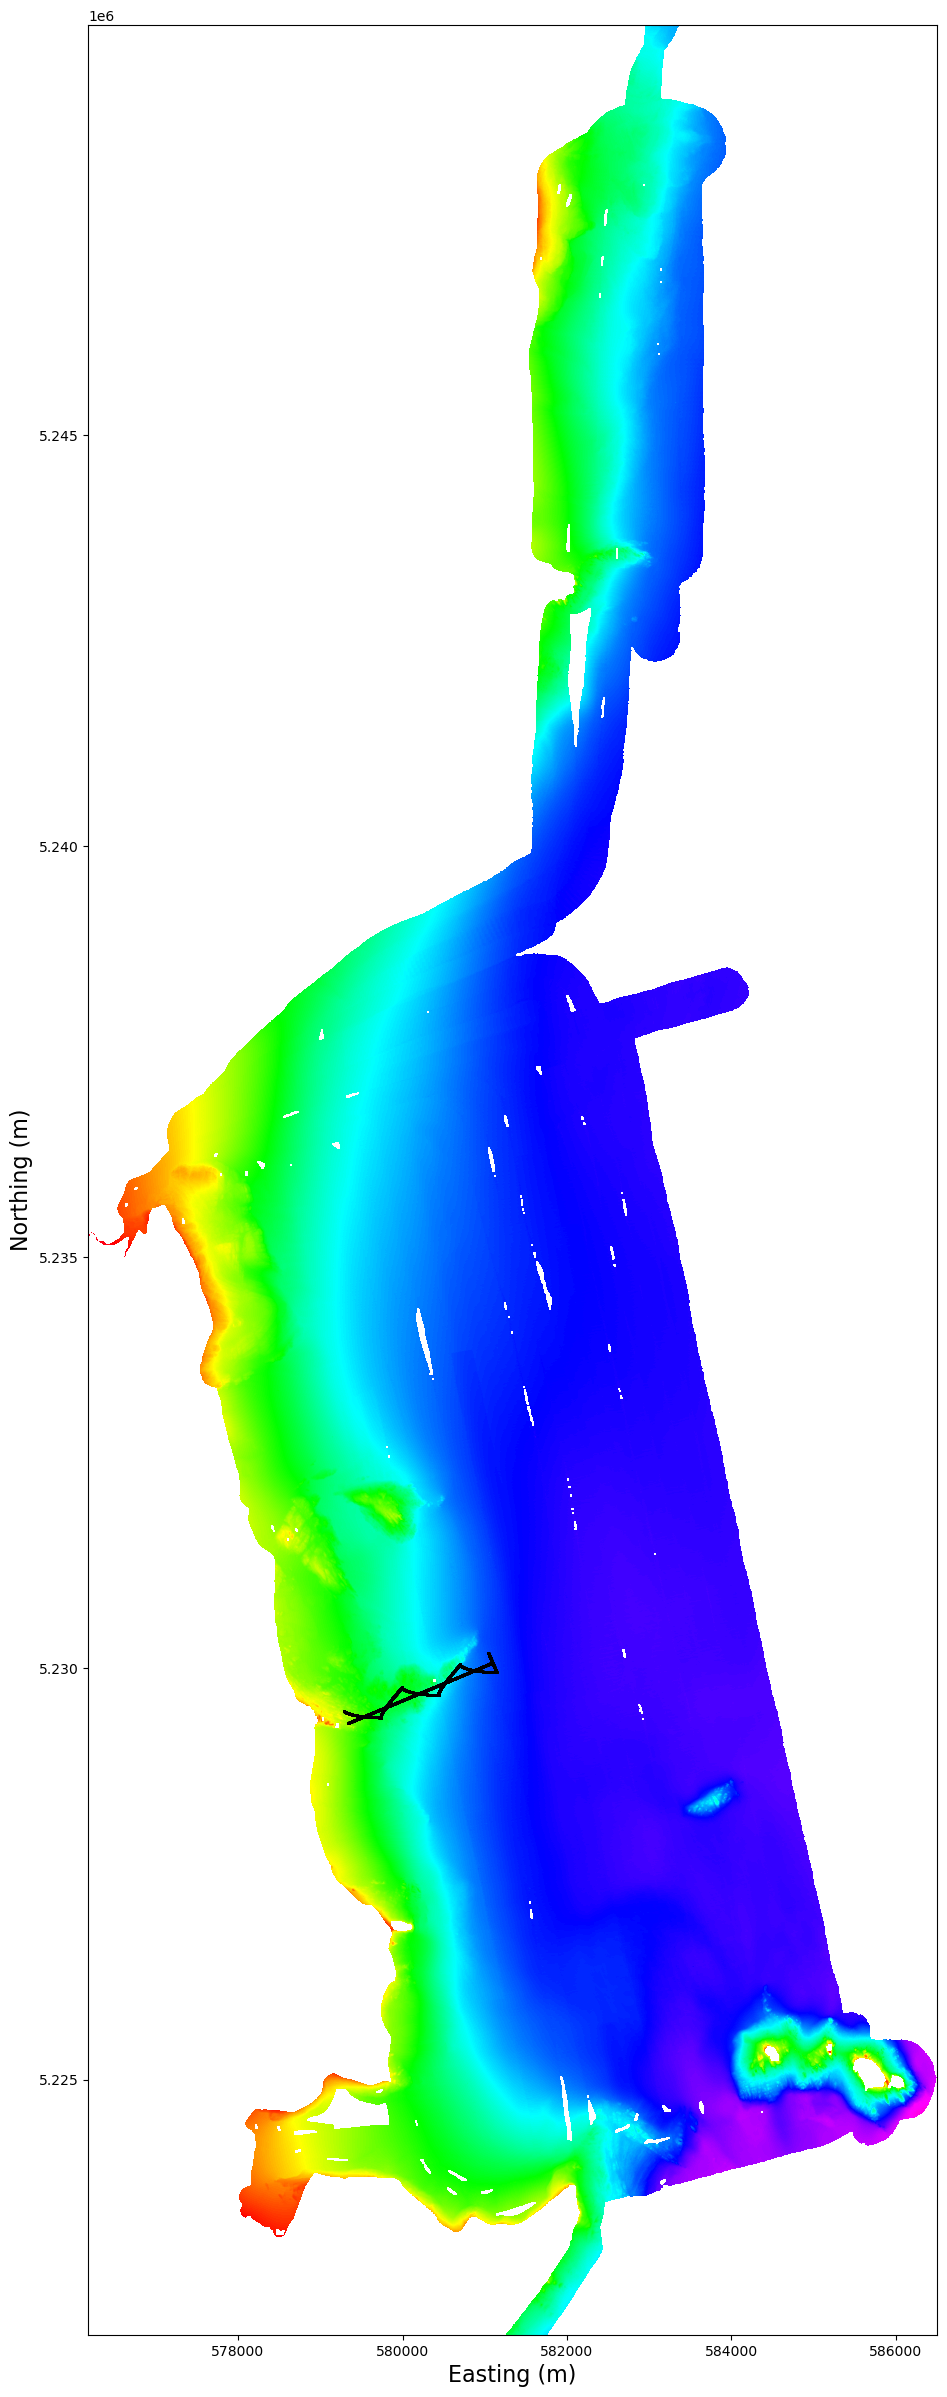

In [57]:
import rasterio
import numpy as np
from rasterio import plot as rasterplot
import geopandas as gpd
from matplotlib import pyplot as plt


# this is how you'd open the raster dataset if you have one
tiff = rasterio.open('Tasmania_ohara_labels/fort1.tif')
tiff_extent = [tiff.bounds[0], tiff.bounds[2], tiff.bounds[1], tiff.bounds[3]]

# i am making this array up
#tiff_band_1 = np.random.randint(0, 10, size=(65, 64))
#tiff_extent = [4159200.0, 4808100.0, 2828000.0, 3482600.0]

shapefile = gpd.read_file('Tasmania_ohara_labels/Ohara_created_images/cropPoints.shp')
#shapefile = shapefile.to_crs('EPSG:32755')
#shapefile = shapefile[shapefile.name == 'Germany']

f, ax = plt.subplots(figsize=(30, 30))

# plot DEM
rasterplot.show(
    #tiff.read(),  # use tiff.read(1) with your data
    masked_array,
    extent=tiff_extent,
    ax=ax, cmap='gist_rainbow'

)
plt.xlabel('Easting (m)',fontsize=16)
plt.ylabel('Northing (m)',fontsize=16)
#fig.colorbar(ax=ax)

# plot shapefiles
shapefile.plot(ax=ax, facecolor='w', edgecolor='k',markersize=0.5)
#plt.savefig('test.jpg')
#plt.show()
plt.savefig('Images_thesis/Ohara_with_path.png',format="png", dpi=resolution_value, bbox_inches='tight')

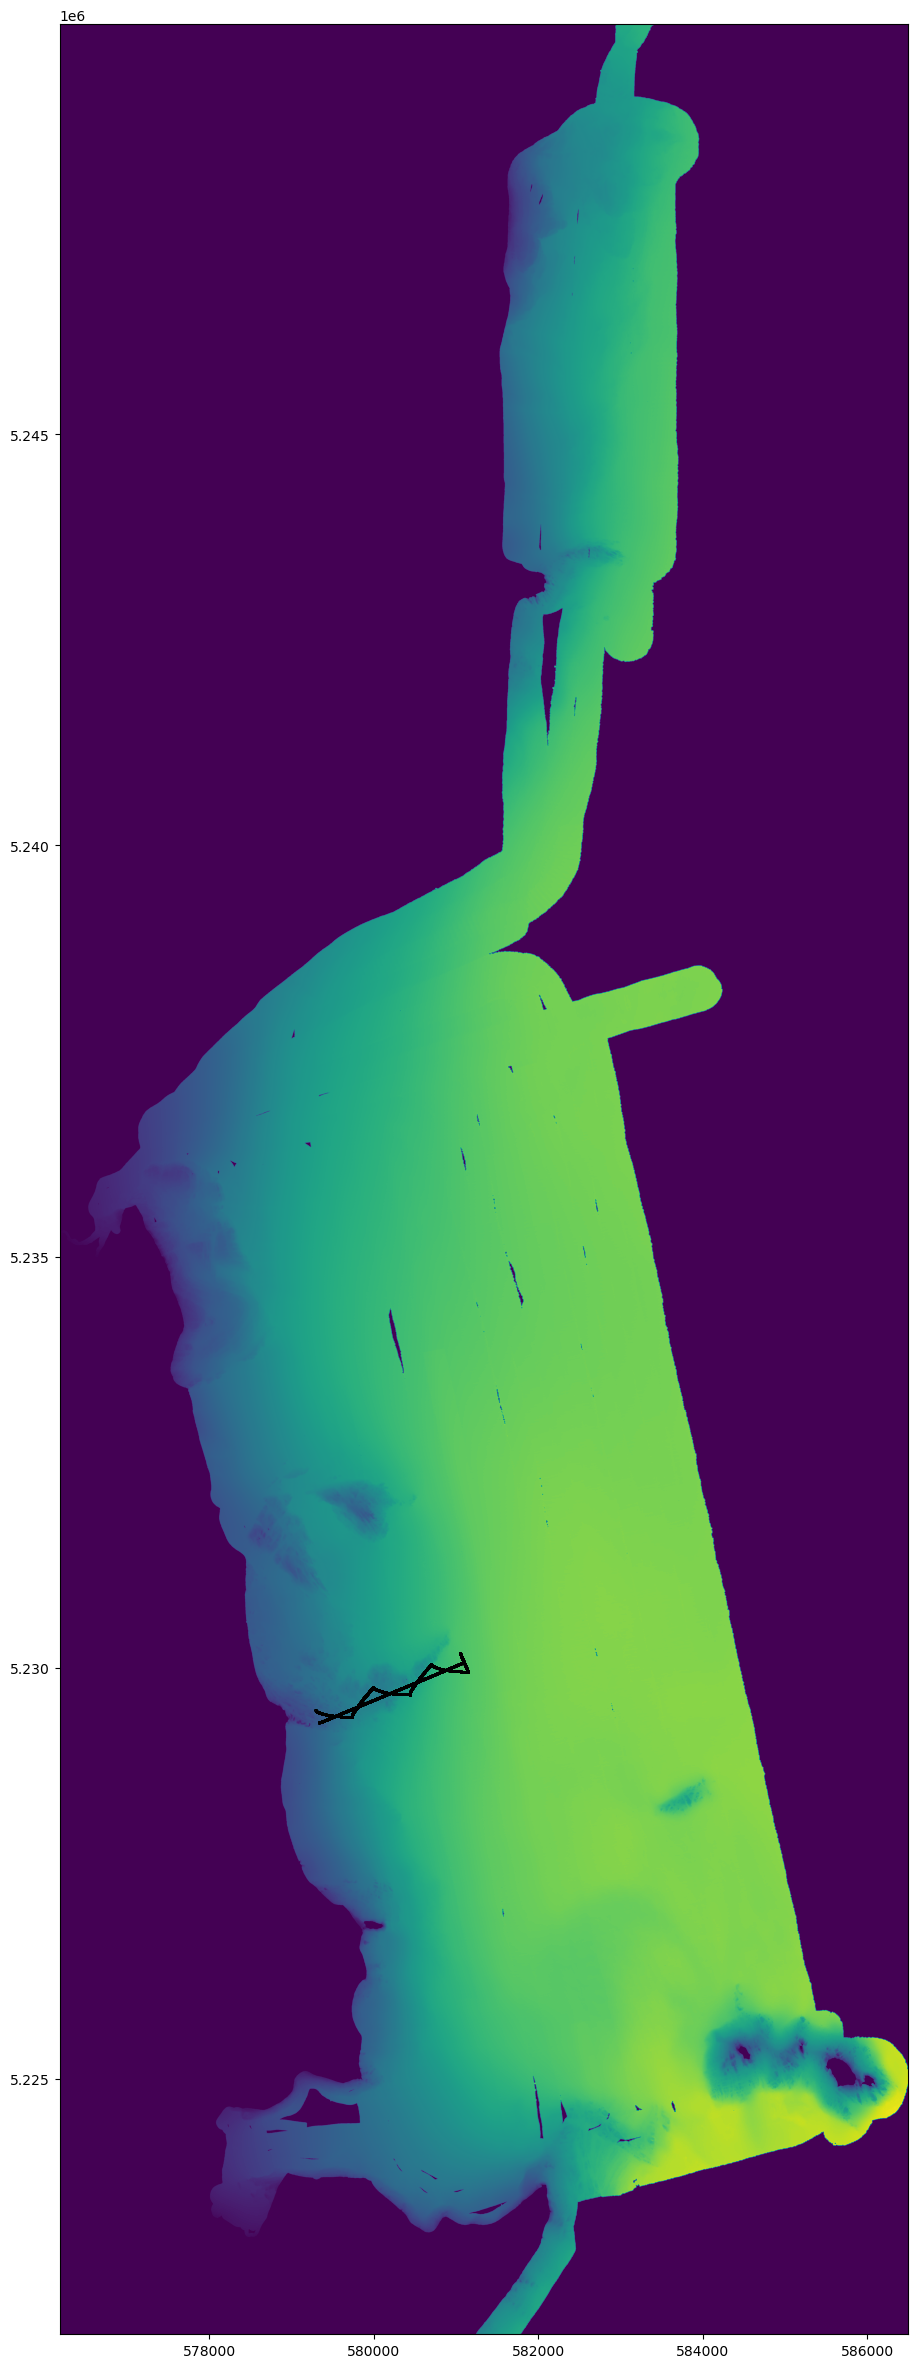

In [52]:
import rasterio
import numpy as np
from rasterio import plot as rasterplot
import geopandas as gpd
from matplotlib import pyplot as plt


# this is how you'd open the raster dataset if you have one
tiff = rasterio.open('Tasmania_ohara_labels/fort1.tif')
tiff_extent = [tiff.bounds[0], tiff.bounds[2], tiff.bounds[1], tiff.bounds[3]]

# i am making this array up
#tiff_band_1 = np.random.randint(0, 10, size=(65, 64))
#tiff_extent = [4159200.0, 4808100.0, 2828000.0, 3482600.0]

shapefile = gpd.read_file('Tasmania_ohara_labels/Ohara_created_images/cropPoints.shp')
#shapefile = shapefile.to_crs('EPSG:32755')
#shapefile = shapefile[shapefile.name == 'Germany']

f, ax = plt.subplots(figsize=(30, 30))

# plot DEM
rasterplot.show(
    #tiff.read(),  # use tiff.read(1) with your data
    new_ohara,
    extent=tiff_extent,
    ax=ax,

)
# plot shapefiles
shapefile.plot(ax=ax, facecolor='w', edgecolor='k',markersize=0.5)
#plt.savefig('test.jpg')
plt.show()
#plt.savefig('Images_thesis/Ohara_with_path.png',format="png", dpi=resolution_value, bbox_inches='tight')

In [37]:
shapefile

,cluster_id,geometry
0,6,POINT (579335.051 5229333.716)
1,6,POINT (579335.226 5229333.819)
2,6,POINT (579335.369 5229333.986)
3,6,POINT (579335.465 5229334.212)
4,6,POINT (579335.531 5229334.499)
...,...,...
10962,6,POINT (579288.909 5229484.373)
10963,6,POINT (579288.788 5229484.728)
10964,6,POINT (579288.687 5229485.088)
10965,6,POINT (579288.607 5229485.474)


# Obtaining corresponding dem images for label coordinates

In [11]:
# import rioxarray and shapley
import rioxarray as riox
from shapely.geometry import Polygon
 
# Read raster using rioxarray
raster = riox.open_rasterio('Tasmania_ohara_labels/fort1.tif')

filename_label = 'Tasmania_ohara_labels/cropped_dems_16_with_labels_correct/'

for idx in range(len(df_merged['cluster_id'])):
    radius = 31 #in meters   #df_merged['Approx. bounding image radius'][idx]
    upper_left_x = df_merged['long_32755'][idx]- radius
    upper_left_y = df_merged['lat_32755'][idx]+ radius
    lower_right_x = df_merged['long_32755'][idx]+ radius
    lower_right_y = df_merged['lat_32755'][idx]- radius

    upper_right_x = df_merged['long_32755'][idx]+ radius
    upper_right_y = df_merged['lat_32755'][idx]+ radius
    lower_left_x = df_merged['long_32755'][idx]- radius
    lower_left_y = df_merged['lat_32755'][idx]- radius

    # Shapely Polygon  to clip raster
    geom = Polygon([[upper_left_x,upper_left_y], [upper_right_x,upper_right_y], [lower_right_x,lower_right_y], [lower_left_x,lower_left_y]])

    # Use shapely polygon in clip method of rioxarray object to clip raster
    clipped_raster = raster.rio.clip([geom],all_touched=True)

    # Save clipped raster
    label_idx = df_merged['cluster_id'][idx]
    clipped_raster.rio.to_raster(filename_label + 'img'+str(idx)+'_label'+str(label_idx)+'.tiff')

    cropped_raster = rasterio.open(filename_label + 'img'+str(idx)+'_label'+str(label_idx)+'.tiff')
    print(cropped_raster.read().shape)
    if cropped_raster.read().shape!=(1, 32, 32):
        print(cropped_raster.read().shape)
    if idx%100==0:
        print('________________passed 100')
    #show(cropped_raster)

(1, 32, 32)
________________passed 100
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)
(1, 32, 32)


KeyboardInterrupt: 

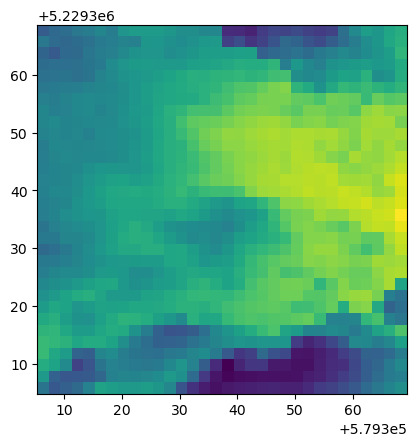

(32, 32)


In [25]:
show(cropped_raster)
print(cropped_raster.shape)

In [102]:
[[upper_left_x,upper_left_y], [upper_right_x,upper_right_y], 
 [lower_right_x,lower_right_y], [lower_left_x,lower_left_y]]

[[579325.2261579889, 5229343.818925982],
 [579345.2261579889, 5229343.818925982],
 [579345.2261579889, 5229323.818925982],
 [579325.2261579889, 5229323.818925982]]

In [42]:
#Split image into 16x16,32x32, 48x48, 96x96
#1)
#For contrastive learning:
#Try single label per image with following resolutions: 
#with 16x16, 48x48, 96x96
#Try multiple labels per image with following resolutions:
#with 16x16, 48x48, 96x96
#2)
#For segmentation/distribution?
#
#
#

# Saving cropped rasters with corresponding labels

In [103]:
print(df_merged['long_32755'][idx])
print(df_merged['lat_32755'][idx])

579335.2261579889
5229333.818925982


In [101]:
cropped_raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 11,
 'height': 11,
 'count': 1,
 'crs': CRS.from_epsg(32755),
 'transform': Affine(2.0, 0.0, 579323.38,
        0.0, -2.0, 5229344.72)}

In [46]:
cropped_raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 6,
 'height': 6,
 'count': 1,
 'crs': CRS.from_epsg(32755),
 'transform': Affine(2.0, 0.0, 579329.38,
        0.0, -2.0, 5229340.72)}

In [ ]:
with rasterio.open(out_fp, "w", **out_meta) as dest:
     dest.write(cropped_raster)

# Creating cropped DEMs from the whole Ohara DEM

In [29]:
from rasterio.windows import Window

filename = 'Tasmania_ohara_labels/cropped_dems_16/'

#for row in range(raster.shape[1]):
#    for col in range(raster.shape[2]):

raster = rasterio.open('Tasmania_ohara_labels/fort1.tif').read()
out_of_zone_val = raster[0,0,0]
print(raster.shape)

window_size = 16
step_size = 16

meta = {'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': window_size,
 'height': window_size,
 'count': 1,
 #'crs': CRS.from_epsg(32755),
 #'transform': Affine(2.0, 0.0, 579323.38,
       # 0.0, -2.0, 5229344.72)
       }

for row in range(0, raster.shape[1], step_size):
    for col in range(0, raster.shape[2], step_size):
        
        col_idx = col
        row_idx = row
        
        with rasterio.open('Tasmania_ohara_labels/fort1.tif') as src:
             cropped_part = src.read(1, window=Window(col_idx, row_idx, window_size, window_size))
        
        
        if out_of_zone_val not in cropped_part:
            if cropped_part.shape == (window_size, window_size):
                out_fp = filename+'ohara_col'+str(col)+'_row'+str(row)
                print(cropped_part.shape, col_idx,row_idx)
                with rasterio.open(out_fp, "w", **meta) as dest:
                    dest.write(cropped_part, indexes = 1)
                


(1, 14044, 5161)
(16, 16) 3392 0
(16, 16) 3408 0
(16, 16) 3424 0
(16, 16) 3440 0
(16, 16) 3456 0
(16, 16) 3472 0
(16, 16) 3488 0
(16, 16) 3504 0
(16, 16) 3520 0
(16, 16) 3536 0
(16, 16) 3552 0
(16, 16) 3568 0


/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/rasterio/__init__.py:230: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = writer(path, mode, driver=driver,


(16, 16) 3392 16
(16, 16) 3408 16
(16, 16) 3424 16
(16, 16) 3440 16
(16, 16) 3456 16
(16, 16) 3472 16
(16, 16) 3488 16
(16, 16) 3504 16
(16, 16) 3520 16
(16, 16) 3536 16
(16, 16) 3552 16
(16, 16) 3568 16
(16, 16) 3392 32
(16, 16) 3408 32
(16, 16) 3424 32
(16, 16) 3440 32
(16, 16) 3456 32
(16, 16) 3472 32
(16, 16) 3488 32
(16, 16) 3504 32
(16, 16) 3520 32
(16, 16) 3536 32
(16, 16) 3552 32
(16, 16) 3392 48
(16, 16) 3408 48
(16, 16) 3424 48
(16, 16) 3440 48
(16, 16) 3456 48
(16, 16) 3472 48
(16, 16) 3488 48
(16, 16) 3504 48
(16, 16) 3520 48
(16, 16) 3536 48
(16, 16) 3552 48
(16, 16) 3376 64
(16, 16) 3392 64
(16, 16) 3408 64
(16, 16) 3424 64
(16, 16) 3440 64
(16, 16) 3456 64
(16, 16) 3472 64
(16, 16) 3488 64
(16, 16) 3504 64
(16, 16) 3520 64
(16, 16) 3536 64
(16, 16) 3376 80
(16, 16) 3392 80
(16, 16) 3408 80
(16, 16) 3424 80
(16, 16) 3440 80
(16, 16) 3456 80
(16, 16) 3472 80
(16, 16) 3488 80
(16, 16) 3504 80
(16, 16) 3520 80
(16, 16) 3536 80
(16, 16) 3376 96
(16, 16) 3392 96
(16, 16) 3408 

KeyboardInterrupt: 

In [3]:
import glob
cropped_16_paths = sorted(glob.glob('Tasmania_ohara_labels/cropped_dems_32/*'))
print(len(cropped_16_paths))

100652


In [31]:
i = 8
rasterio.open(cropped_16_paths[i]).read()

/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


array([[[62.112, 62.088, 62.227, 62.05 , 62.023, 62.019, 62.075, 62.123,
         62.16 , 62.252, 62.305, 62.398, 62.51 , 62.539, 62.337, 62.404],
        [61.814, 62.155, 62.108, 62.087, 62.009, 61.956, 62.048, 62.07 ,
         62.119, 62.197, 62.213, 62.285, 62.369, 62.431, 62.478, 62.408],
        [61.615, 61.708, 62.093, 61.943, 62.044, 62.034, 62.03 , 62.032,
         62.097, 62.119, 62.194, 62.262, 62.333, 62.359, 62.394, 62.39 ],
        [61.851, 61.82 , 61.832, 61.977, 61.981, 62.031, 61.995, 62.018,
         61.784, 62.062, 62.126, 62.178, 62.255, 62.29 , 62.292, 62.271],
        [61.871, 61.793, 61.716, 61.879, 61.991, 61.961, 61.949, 62.01 ,
         62.002, 61.974, 62.037, 62.124, 62.099, 62.129, 62.222, 62.178],
        [61.877, 61.943, 61.892, 61.97 , 62.045, 61.956, 61.878, 62.016,
         62.016, 61.949, 62.066, 62.113, 62.058, 61.879, 62.148, 62.069],
        [61.891, 61.916, 61.967, 61.987, 62.07 , 62.086, 62.076, 62.075,
         62.043, 62.118, 62.104, 62.107, 62.1

# Creating two channeled image (bathym + image)

In [2]:
csv_paths = sorted(glob.glob('Tasmania_ohara_labels/All_images_csv/*'))
csv_paths

['Tasmania_ohara_labels/All_images_csv/20081006_231255_waterfall_05_transect_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081007_033355_waterfall_06_tightpatch_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081007_224547_ohara_07_transect_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081008_224114_hippoN_09_transect_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081009_045504_littlehippoN_11_transect_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081009_215637_littlehippoSE_12_transect_latlong.csv',
 'Tasmania_ohara_labels/All_images_csv/20081014_052323_ohara_20_oneline_latlong.csv']

In [3]:
df_csvs = pd.read_csv(csv_paths[0])
df_csvs[-4:]

,year,month,day,hour,minute,second,northing,easting,depth,latitude,longitude,roll,pitch,heading,altitude,leftimage,rightimage
12258,2008,10,7,2,41,53.3,57.172677,-16.881591,36.690643,-43.061047,147.964585,0.028832,-0.006275,-1.591872,1.99,PR_20081007_024153_033_LC16.png,PR_20081007_024153_033_RM16.png
12259,2008,10,7,2,41,54.3,56.715602,-16.918734,36.683775,-43.061051,147.964584,0.030422,-0.006845,-1.531905,1.96,PR_20081007_024154_032_LC16.png,PR_20081007_024154_032_RM16.png
12260,2008,10,7,2,41,55.3,56.260627,-17.002164,36.666325,-43.061055,147.964583,0.033200,-0.008093,-1.470009,1.99,PR_20081007_024155_031_LC16.png,PR_20081007_024155_031_RM16.png
12261,2008,10,7,2,41,56.3,55.813867,-17.108124,36.639281,-43.061059,147.964582,0.033908,-0.007655,-1.406819,1.97,PR_20081007_024156_034_LC16.png,PR_20081007_024156_034_RM16.png


In [4]:
for idx, path in enumerate(csv_paths):
    if idx!=0:
        df_new = pd.read_csv(path)
        df_csvs = pd.concat([df_csvs, df_new])
        

df_csvs.rename(columns={"leftimage": "Left image name"}, inplace = True)
df_csvs['Left image name'] = df_csvs['Left image name'].str.strip().str.split('.').str[0]+'.tif'
df_csvs.reset_index(inplace = True)
df_csvs[-3:]

,index,year,month,day,hour,minute,second,northing,easting,depth,latitude,longitude,roll,pitch,heading,altitude,Left image name,rightimage
57207,6561,2008,10,14,7,24,52.82,550.959485,1286.101300,63.677437,-43.079462,147.990404,0.014028,0.016612,-2.025841,2.402,PR_20081014_072452_820_LC16.tif,PR_20081014_072452_820_RM16.png
57208,6562,2008,10,14,7,24,53.81,550.570938,1286.284656,63.789218,-43.079465,147.990407,0.018790,-0.005171,-2.086175,2.438,PR_20081014_072453_817_LC16.tif,PR_20081014_072453_817_RM16.png
57209,6563,2008,10,14,7,24,54.81,550.157984,1286.444176,63.893574,-43.079469,147.990409,0.014599,-0.008395,-2.084551,2.453,PR_20081014_072454_816_LC16.tif,PR_20081014_072454_816_RM16.png


In [36]:
import glob
import pandas as pd
imgs = sorted(glob.glob('Tasmania_ohara_labels/Ohara_images_from_prof_2/*/*'))
print(len(imgs))
df_images = pd.DataFrame(imgs, columns =['Left image name'])
df_images['Left image name'] = df_images['Left image name'].str.split('/').str[-1]
df_images[-2:]

20547


,Left image name
20545,PR_20081014_072453_817_LC16.tif
20546,PR_20081014_072454_816_LC16.tif


In [37]:
df_merged_csv_images = pd.merge(df_csvs, df_images, on = 'Left image name')
df_merged_csv_images[-3:]

,index,year,month,day,hour,minute,second,northing,easting,depth,latitude,longitude,roll,pitch,heading,altitude,Left image name,rightimage
20544,6561,2008,10,14,7,24,52.82,550.959485,1286.101300,63.677437,-43.079462,147.990404,0.014028,0.016612,-2.025841,2.402,PR_20081014_072452_820_LC16.tif,PR_20081014_072452_820_RM16.png
20545,6562,2008,10,14,7,24,53.81,550.570938,1286.284656,63.789218,-43.079465,147.990407,0.018790,-0.005171,-2.086175,2.438,PR_20081014_072453_817_LC16.tif,PR_20081014_072453_817_RM16.png
20546,6563,2008,10,14,7,24,54.81,550.157984,1286.444176,63.893574,-43.079469,147.990409,0.014599,-0.008395,-2.084551,2.453,PR_20081014_072454_816_LC16.tif,PR_20081014_072454_816_RM16.png


In [18]:
imgs_to_delete = []
for i in df_images['Left image name']:
    if i not in df_merged_csv_images['Left image name'].values:
        imgs_to_delete.append(i)
        print(i)

PR_20081014_062944_355_LC16(1).tif
PR_20081014_063010_359_LC16(1).tif
PR_20081014_063011_359_LC16(1).tif


In [11]:
from pyproj import Proj, transform

Pfrom = Proj(init='epsg:4326')
Pto = Proj(init='epsg:32755')

long_32755,lat_32755 = transform(Pfrom, Pto, df_merged_csv_images['longitude'], df_merged_csv_images['latitude'])
df_merged_csv_images['long_32755'] = long_32755
df_merged_csv_images['lat_32755'] = lat_32755
df_merged_csv_images[-3:]

/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/azamat.kaibaldiyev/miniconda3/envs/contrastive_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_167555/3660207632.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotcha

,index,year,month,day,hour,minute,second,northing,easting,depth,latitude,longitude,roll,pitch,heading,altitude,Left image name,rightimage,long_32755,lat_32755
20544,6561,2008,10,14,7,24,52.82,550.959485,1286.101300,63.677437,-43.079462,147.990404,0.014028,0.016612,-2.025841,2.402,PR_20081014_072452_820_LC16.tif,PR_20081014_072452_820_RM16.png,580622.385725,5.229885e+06
20545,6562,2008,10,14,7,24,53.81,550.570938,1286.284656,63.789218,-43.079465,147.990407,0.018790,-0.005171,-2.086175,2.438,PR_20081014_072453_817_LC16.tif,PR_20081014_072453_817_RM16.png,580622.568365,5.229885e+06
20546,6563,2008,10,14,7,24,54.81,550.157984,1286.444176,63.893574,-43.079469,147.990409,0.014599,-0.008395,-2.084551,2.453,PR_20081014_072454_816_LC16.tif,PR_20081014_072454_816_RM16.png,580622.726321,5.229884e+06


In [49]:
df_merged = df_merged_csv_images
# import rioxarray and shapley
import rioxarray as riox
from shapely.geometry import Polygon
 
# Read raster using rioxarray
raster = riox.open_rasterio('Tasmania_ohara_labels/fort1.tif')

filename_label = 'Tasmania_ohara_labels/cropped_dems_16_imgs_100/'

for idx in range(len(df_merged)):
    radius = 15 #in meters   #df_merged['Approx. bounding image radius'][idx]
    upper_left_x = df_merged['long_32755'][idx]- radius
    upper_left_y = df_merged['lat_32755'][idx]+ radius
    lower_right_x = df_merged['long_32755'][idx]+ radius
    lower_right_y = df_merged['lat_32755'][idx]- radius

    upper_right_x = df_merged['long_32755'][idx]+ radius
    upper_right_y = df_merged['lat_32755'][idx]+ radius
    lower_left_x = df_merged['long_32755'][idx]- radius
    lower_left_y = df_merged['lat_32755'][idx]- radius

    # Shapely Polygon  to clip raster
    geom = Polygon([[upper_left_x,upper_left_y], [upper_right_x,upper_right_y], [lower_right_x,lower_right_y], [lower_left_x,lower_left_y]])

    # Use shapely polygon in clip method of rioxarray object to clip raster
    clipped_raster = raster.rio.clip([geom],all_touched=True)

    # Save clipped raster
    #label_idx = df_merged['cluster_id'][idx]
    clipped_raster.rio.to_raster(filename_label + df_merged['Left image name'][idx])

    cropped_raster = rasterio.open(filename_label + df_merged['Left image name'][idx])
    print(cropped_raster.read().shape)
    if cropped_raster.read().shape!=(1, 32, 32):
        print(cropped_raster.read().shape)
    if idx%100==0:
        print('________________passed 100')
    #show(cropped_raster)

(1, 16, 16)
(1, 16, 16)
________________passed 100
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)
(1, 16, 16)


KeyboardInterrupt: 

In [51]:
dems_paths = sorted(glob.glob(filename_label+'*'))
print(len(dems_paths))
dems_paths[-3:]

222


['Tasmania_ohara_labels/cropped_dems_16_imgs_100/PR_20081006_232112_371_LC16.tif',
 'Tasmania_ohara_labels/cropped_dems_16_imgs_100/PR_20081006_232113_368_LC16.tif',
 'Tasmania_ohara_labels/cropped_dems_16_imgs_100/PR_20081006_232114_367_LC16.tif']

In [45]:
rasterio.open(dems_paths[0])

<open DatasetReader name='Tasmania_ohara_labels/cropped_dems_32_imgs_100/PR_20081006_231732_335_LC16.tif' mode='r'>

In [46]:
Image.open(dems_paths[0])

ValueError: Could not save to PNG for display

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=32x32>

# Rasters for thesis showing


In [70]:
bathym =  sorted(glob.glob('Tasmania_ohara_labels/cropped_dems_32/*'))
print(len(bathym))
bathym_labels =  sorted(glob.glob('Tasmania_ohara_labels/cropped_dems_32_with_labels/*'))
print(len(bathym_labels))

100652
10967


In [59]:
import glob
imgs = sorted(glob.glob('Tasmania_ohara_labels/Ohara_images_from_prof/*/*'))
print(len(imgs))
imgs[:2]
imgs_new = sorted(glob.glob('Tasmania_ohara_labels/Ohara_images_from_prof_2/*/*'))
print(len(imgs_new))
imgs_new[:2]
imgs = imgs+imgs_new
print(len(imgs))

36663
20547
57210


In [60]:
import pandas as pd
df_labels =  pd.read_csv('Tasmania_ohara_labels/image_labels.data',skiprows = np.arange(15),sep = "\t")
                    #names = ['row_id','timestamp','left_image','right_image','cluster_id'], )
df_labels.rename(columns = {'left_image':'Left image name', 'right_image':'Right image name'}, inplace = True)
df_labels['Left image name'] = df_labels['Left image name'].str.split('.').str[0].str.strip()+'.tif'
df_labels['Right image name'] = df_labels['Right image name'].str.strip()
df_labels[-2:]
df_images = pd.DataFrame(imgs, columns =['Left image name'])
df_images['Left image name'] = df_images['Left image name'].str.split('/').str[-1]
df_images[-2:]
df_merged_images = pd.merge(df_labels, df_images, on = 'Left image name')
df_merged_images['Left image name'] = 'Tasmania_ohara_labels/Ohara_images_from_prof/i20081007_224547_gtif/'+df_merged_images['Left image name']
df_merged_images['cluster_id'] = df_merged_images['cluster_id'].replace([1, 2, 3 ,4,5, 6, 7, 8], [0, 1, 2, 3 ,4,5, 6, 7])
df_merged_images[-2:]

,row_id,timestamp,Left image name,Right image name,cluster_id
10965,11276,1.223432e+09,Tasmania_ohara_labels/Ohara_images_from_prof/i...,PR_20081008_021104_665_RM16.png,5
10966,11277,1.223432e+09,Tasmania_ohara_labels/Ohara_images_from_prof/i...,PR_20081008_021105_662_RM16.png,5


In [278]:
from PIL import Image
label = 8
cluster_df = df_merged_images[df_merged_images['cluster_id'] == label]
cluster_df

,row_id,timestamp,Left image name,Right image name,cluster_id


In [275]:
row = 6420
img_acous = Image.open(df_merged_images['Left image name'][row])
print(df_merged_images['cluster_id'][row:row+1])
img_acous
# save a image using extension
img_acous.save("Images_thesis/"+"row"+str(row)+"_Acoustic_label"+str(label)+".jpg")

6420    7
Name: cluster_id, dtype: int64


img6420_label7.tiff


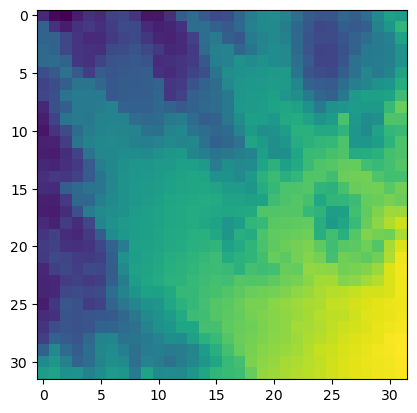

In [276]:
#RASTERS 32
import os
pre = 'Tasmania_ohara_labels/cropped_dems_32_with_labels/'

prefixed = [filename for filename in os.listdir(pre) if filename.startswith("img"+str(row)+'_')]
print(prefixed[0])
matplotlib.image.imsave('Images_thesis/'+"row"+str(row)+'_Raster32_'+prefixed[0][:-5]+'.png',rasterio.open(pre+prefixed[0]).read()[0])
plt.imshow(rasterio.open(pre+prefixed[0]).read()[0])

img6420_label7.tiff


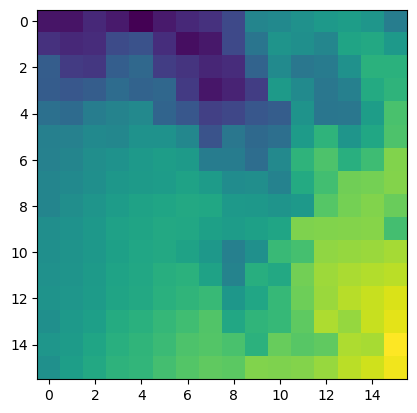

In [277]:
#RASTER 16
import os
pre = 'Tasmania_ohara_labels/cropped_dems_16_with_labels_correct/'

prefixed = [filename for filename in os.listdir(pre) if filename.startswith("img"+str(row)+'_')]
print(prefixed[0])
matplotlib.image.imsave('Images_thesis/'+"row"+str(row)+'_Raster16_'+prefixed[0][:-5]+'.png',rasterio.open(pre+prefixed[0]).read()[0])
plt.imshow(rasterio.open(pre+prefixed[0]).read()[0])